In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df_1st_hour = pd.read_csv(r'C:\Users\arvinmvn\Desktop\Split Throughput\1st hour.csv')
df_2nd_hour = pd.read_csv(r'C:\Users\arvinmvn\Desktop\Split Throughput\2nd hour.csv')
df_3rd_hour = pd.read_csv(r'C:\Users\arvinmvn\Desktop\Split Throughput\3rd hour.csv')
df_4th_hour = pd.read_csv(r'C:\Users\arvinmvn\Desktop\Split Throughput\4th hour.csv')
df_tm = pd.read_excel(r'C:\Users\arvinmvn\Desktop\Split Throughput\Radhika Org TM-OM-SM mapping.xlsx')
df_tm.head()

,DA Login,TM,OM,Sr.OM
0,aaalagap,ketank,sureshhv,seturams
1,aafafroz,saranyna,rebepaul,jothindr
2,aakavyas,suyambar,ilaraja,maswini
3,aakgupt,jdara,khadsayy,jothindr
4,aanbub,sekal,jagarekh,radhikac


In [158]:
df_1st_hour = df_1st_hour.rename(columns = {'Processed Units': 'Processed Units-1'}, inplace = False)
df_2nd_hour = df_2nd_hour.rename(columns = {'Processed Units': 'Processed Units-2'}, inplace = False)
df_3rd_hour = df_3rd_hour.rename(columns = {'Processed Units': 'Processed Units-3'}, inplace = False)
df_4th_hour = df_4th_hour.rename(columns = {'Processed Units': 'Processed Units-4'}, inplace = False)

df_1st_hour = df_1st_hour[["DA Login", "Processed Units-1"]]
df_2nd_hour = df_2nd_hour[["DA Login", "Processed Units-2"]]
df_3rd_hour = df_3rd_hour[["DA Login", "Processed Units-3"]]
df_4th_hour = df_4th_hour[["DA Login", "Processed Units-4"]]

df_2nd_hour.head()

,DA Login,Processed Units-2
0,aaalagap,752
1,aafafroz,28
2,aakavyas,0
3,aakgupt,0
4,aanbub,0


In [159]:
df_merge=pd.merge(df_1st_hour,df_2nd_hour,on="DA Login", how="outer")
df_merge=pd.merge(df_merge,df_3rd_hour,on="DA Login",how="outer")
df_merge=pd.merge(df_merge,df_4th_hour,on="DA Login",how="outer")
df_merge=pd.merge(df_merge,df_tm,on="DA Login",how="outer")
df_merge['TM'].unique()
df_merge.head()

,DA Login,Processed Units-1,Processed Units-2,Processed Units-3,Processed Units-4,TM,OM,Sr.OM
0,aaalagap,670.0,752.0,795.0,795.0,ketank,sureshhv,seturams
1,aafafroz,19.0,28.0,60.0,89.0,saranyna,rebepaul,jothindr
2,aakavyas,0.0,0.0,0.0,0.0,suyambar,ilaraja,maswini
3,aakgupt,0.0,0.0,0.0,0.0,jdara,khadsayy,jothindr
4,aanbub,0.0,0.0,0.0,0.0,sekal,jagarekh,radhikac


In [160]:
#Radikcha's org DA Level Breakddown RAW

df_merge.insert(2, "1-2",df_merge['Processed Units-2']- df_merge['Processed Units-1'])
df_merge.insert(2, "2-3",df_merge['Processed Units-3']- df_merge['Processed Units-2'])
df_merge.insert(2, "3-4",df_merge['Processed Units-4']- df_merge['Processed Units-3'])
df_throughput=df_merge[['DA Login','TM','OM','Sr.OM','1-2','2-3','3-4']]
df_throughput['associate_total']=df_throughput[['1-2','2-3','3-4']].sum(axis=1)
df_throughput['TM'].unique()
df_throughput.head()

<ipython-input-160-7217c716216a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throughput['associate_total']=df_throughput[['1-2','2-3','3-4']].sum(axis=1)


,DA Login,TM,OM,Sr.OM,1-2,2-3,3-4,associate_total
0,aaalagap,ketank,sureshhv,seturams,82.0,43.0,0.0,125.0
1,aafafroz,saranyna,rebepaul,jothindr,9.0,32.0,29.0,70.0
2,aakavyas,suyambar,ilaraja,maswini,0.0,0.0,0.0,0.0
3,aakgupt,jdara,khadsayy,jothindr,0.0,0.0,0.0,0.0
4,aanbub,sekal,jagarekh,radhikac,0.0,0.0,0.0,0.0


In [161]:
## TM -> DA Analysis
df_throughput = df_throughput[df_throughput['TM']=='danijos'] ## update TM alias


table = pd.pivot_table(df_throughput, values=['1-2','2-3','3-4','associate_total'], index=['DA Login'],margins=True,
               margins_name='team_total', aggfunc=sum , fill_value=0)
table.sort_values(by='associate_total', ascending=False)

,1-2,2-3,3-4,associate_total
DA Login,,,,
team_total,1797,1932,1019,4748
prrajaku,153,76,36,265
gowthsa,63,111,89,263
sdepi,104,121,18,243
mjnani,114,65,53,232
szparth,99,60,61,220
eltonjoh,52,111,55,218
joshuvaj,87,92,27,206
mamgane,67,90,45,202


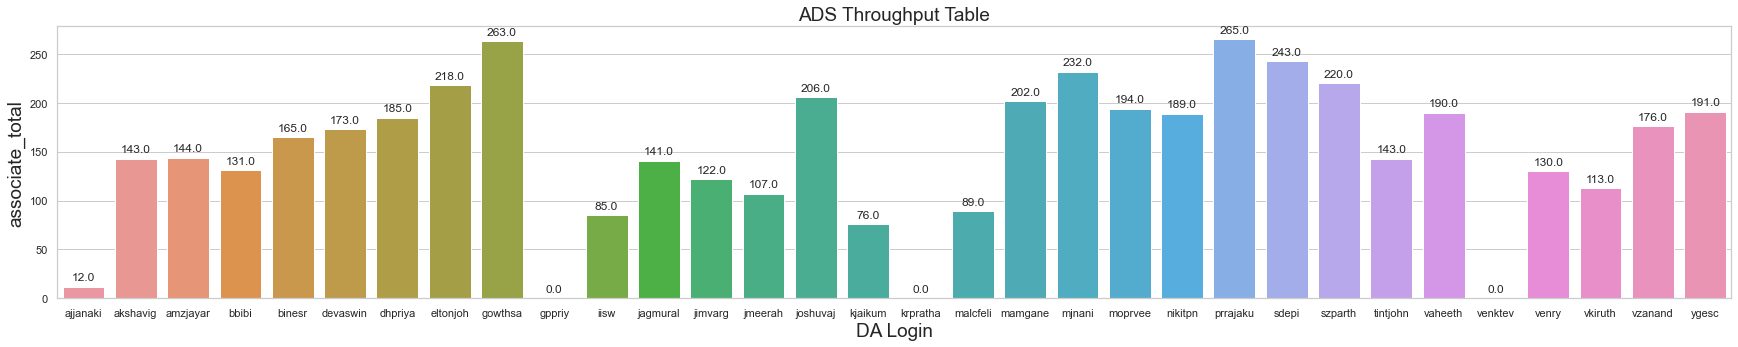

In [200]:
## grpahical view

sns.set(style="whitegrid")


a4_dims = (30, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xlabel('DA Login',fontsize=19)
ax.set_ylabel('associate_total',fontsize=19)
ax.set_title('ADS Throughput Table',fontsize=19)
sss = sns.barplot(ax=ax,x="DA Login", y="associate_total", data=df_throughput)
for p in sss.patches:
    sss.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')